In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv("Student_performance_data.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [4]:
df = df.astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   float64
 1   Age                2392 non-null   float64
 2   Gender             2392 non-null   float64
 3   Ethnicity          2392 non-null   float64
 4   ParentalEducation  2392 non-null   float64
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   float64
 7   Tutoring           2392 non-null   float64
 8   ParentalSupport    2392 non-null   float64
 9   Extracurricular    2392 non-null   float64
 10  Sports             2392 non-null   float64
 11  Music              2392 non-null   float64
 12  Volunteering       2392 non-null   float64
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(15)
memory usage: 280.4 KB


In [6]:
df.drop(columns="StudentID", axis=1, inplace=True)

In [7]:
df['GPA'].value_counts()

GPA
0.000000    16
4.000000     7
2.929196     1
2.527607     1
2.167615     1
            ..
1.687900     1
2.952146     1
0.963375     1
3.334972     1
2.140014     1
Name: count, Length: 2371, dtype: int64

In [8]:
df.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [9]:
z = np.abs(stats.zscore(df['GPA']))
print(z)

0       1.118086
1       1.242374
2       1.960277
3       0.161790
4       0.675573
          ...   
2387    1.693315
2388    1.500565
2389    0.834845
2390    0.112452
2391    0.255559
Name: GPA, Length: 2392, dtype: float64


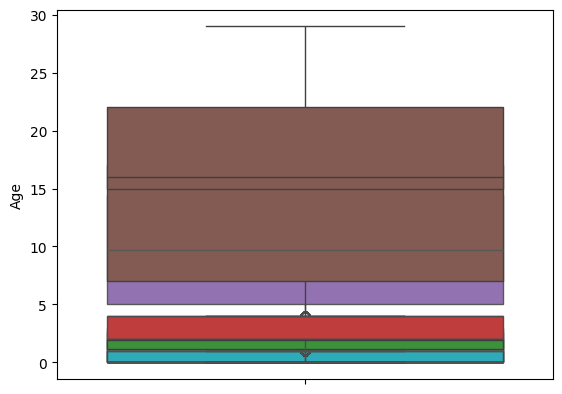

In [10]:
for col in df.columns:
    sns.boxplot(df[col])

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>,
        <Axes: title={'center': 'ParentalEducation'}>],
       [<Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>,
        <Axes: title={'center': 'ParentalSupport'}>],
       [<Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>,
        <Axes: title={'center': 'Volunteering'}>],
       [<Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >, <Axes: >]],
      dtype=object)

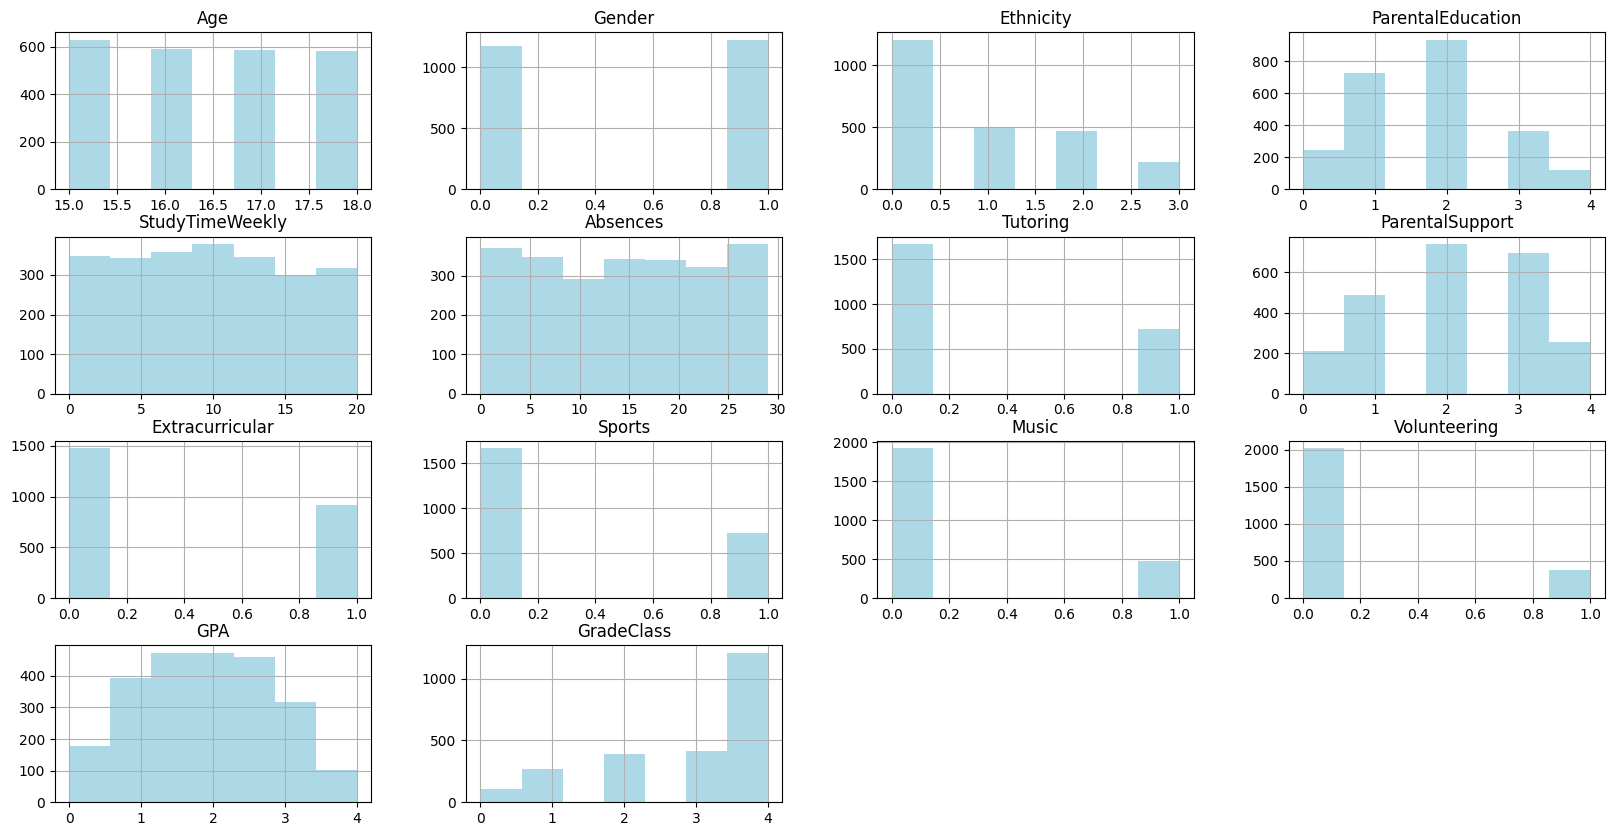

In [11]:
df.hist(figsize=(20,10),bins=7, color='lightblue')

In [12]:
columns = list(df.columns)

numeric = []
categorical = []

for i in columns:
    if len(df[i].unique())>5:
        numeric.append(i)
    else:
        categorical.append(i)

print("Numerical features:", numeric)
print("Categorical features:", categorical)

Numerical features: ['StudyTimeWeekly', 'Absences', 'GPA']
Categorical features: ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']
